---
# Severity Classification of Alzheimer's Disease Using MRI Images
## Jason Lu, Juan Marcucci, Dan Rossetti
---
---

# NOTEBOOK 1 - Exploratory Data Analaysis
Notebook Summary:
This notebook examines the brain MRI images by displaying one image from each class for both the training and testing datasets.  Additionally, the images sizes for all images in both datasets are compared along with basic statistics for each class.  A more in-depth analysis is then performed to understand trends between the different classes to create additional comparisons.  The indepth analyses were inspired by an article shared by Eric Bayless which can be found [here](https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2).

---
---

#  WARNING:  NOTEBOOK MUST BE RUN IN GOOGLE COLAB

Due to the computational demands of the convolutional neural networks used in this model requiring GPUs, this project was created entirely on Google Colab.

Further, the data are imported by cloning the Github repo where all of the project materials are stored into Google Colab so that the code can be run anywhere with the relative paths in this notebook.  With that, these relative paths will not work outside of Google Colab.

---
---

# 0 - Imports

In [ ]:
# Basic imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Every method known to set random seeds (from the following sources):
# Help with this import:  https://www.tensorflow.org/tutorials/quickstart/advanced
import random
import tensorflow as tf
seed = 42
# Source provided by Eric Bayless for help with this:  
#  https://www.tensorflow.org/api_docs/python/tf/keras/utils/set_random_seed
tf.keras.utils.set_random_seed(seed)
random.seed(seed)
np.random.seed(seed)
# Help with code below from:  https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(seed)

# Keras TensorFlow imports
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import img_to_array, load_img

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

# 1 - Connect to Github, Read Data
The steps performed here to import the data into Google Colab are identical to those in all other notebooks, but here, they are broken up into individual steps for clarity.

Again, the steps below are performed to enable anyone to access the data and run the notebook in Google Colab.

## 1.1 - Clone Github Repo, cd into 'data' Folder, Unzip Data

In [ ]:
# Clear out the directory in case you run the code top to bottom.
!rm -r ga_project_4/

# Inspiration to do this from:  https://stackoverflow.com/questions/65386157/importing-images-from-github-to-colab
# Code help from:  https://neptune.ai/blog/google-colab-dealing-with-files
!git clone https://github.com/drossDS/ga_project_4.git

rm: cannot remove 'ga_project_4/': No such file or directory
Cloning into 'ga_project_4'...
remote: Enumerating objects: 6476, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 6476 (delta 17), reused 40 (delta 14), pack-reused 6424
Receiving objects: 100% (6476/6476), 157.10 MiB | 18.27 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [ ]:
# Help with this code to cd into folders from:  
#  https://stackoverflow.com/questions/48298146/changing-directory-in-google-colab-breaking-out-of-the-python-interpreter
%cd ga_project_4/
%cd data/
!ls

/content/ga_project_4
/content/ga_project_4/data
archive_binary.zip  archive_mixed.zip  archive.zip


In [ ]:
# Unzip data
!unzip -q archive.zip

## 1.2 - Explore the Images in All Folders

(176, 208)


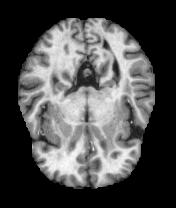

In [ ]:
# Let's look at one of the images
brain_image = load_img('/content/ga_project_4/data/Alzheimer_s Dataset/train/NonDemented/nonDem0.jpg')

# Code help with images size:  https://machinelearningmastery.com/how-to-load-convert-and-save-images-with-the-keras-api/
'''
Note that '.size' will give the pixels in an (x, y) format, whereas matrices
usually are presented in (row, column) format which is the exact opposite.
Thus, the values will need to be swapped when going between image size and
matrix sizes.
'''
print(brain_image.size)

# View the image
brain_image

In [ ]:
# Establish folder management variables:

# Store the base file path:
base_path = '/content/ga_project_4/data/Alzheimer_s Dataset'

# Create a list of top-level folders, and second level folders
top_lev = ['train', 'test']
second_lev = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [ ]:
# Write a loop to determine how many images of each class there are:

image_count_list = []
value_counts_list = []

# Create a for loop that goes through train and test
for folder_1 in top_lev:
  class_list = []
  # Create loop that goes through all the category folders
  for folder_2 in second_lev:
    
    # Loop through each subfolder and aggregate the subfolder names into a list
    for file in os.listdir(base_path + '/' + folder_1 + '/' + folder_2):
      class_list.append(folder_2)
  
  # Create series out of the lists so that .value_counts can be run twice
  value_counts_list.append(pd.Series(class_list).value_counts())
  value_counts_list.append(pd.Series(class_list).value_counts(normalize = True))

# Show a dataframe with all the value counts and percentages for the train and test sets
pd.DataFrame(value_counts_list, index = ['Train Counts', 'Train Pcnts', 'Test Counts', 'Test Pcnts']).T

,Train Counts,Train Pcnts,Test Counts,Test Pcnts
NonDemented,2560.0,0.499902,640.0,0.500391
VeryMildDemented,1792.0,0.349932,448.0,0.350274
MildDemented,717.0,0.140012,179.0,0.139953
ModerateDemented,52.0,0.010154,12.0,0.009382


In [ ]:
# Write a loop to store file paths to one image in each sub-directory
sample_image_paths = []

# Create a for loop that goes through train and test
for folder_1 in top_lev:

  # Create loop that goes through all the category folders
  for folder_2 in second_lev:

    # Loop through the images in each folder, but only look at the first one in the list
    for file in [os.listdir(base_path + '/' + folder_1 + '/' + folder_2)[0]]:
      sample_image_paths.append([base_path + '/' + folder_1 + '/' + folder_2 + '/' + file, folder_1, folder_2, file])

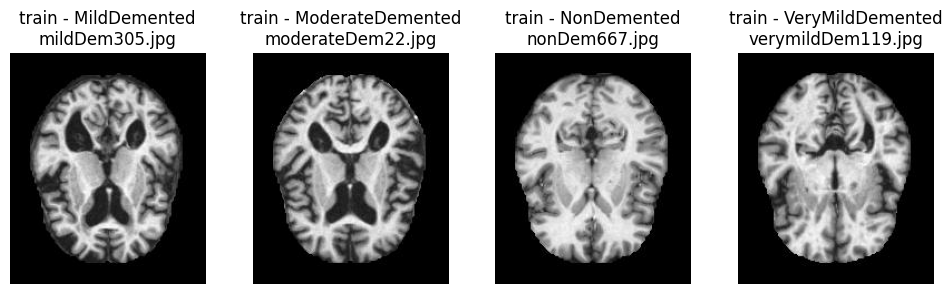

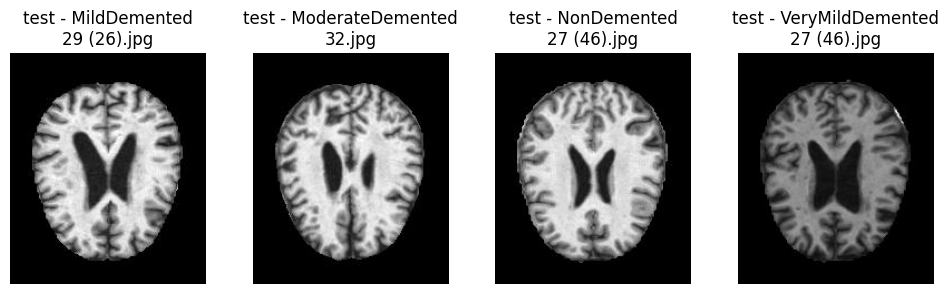

In [ ]:
# Plot sample brain images side-by-side for train and test datasets

# The following vode was inspired by:  https://stackoverflow.com/questions/67083671/trying-to-have-matplotlib-set-the-title-as-whatever-input-i-choose-for-ticker-pa

# ============  TRAINING DATA  =====================================
plt.figure(figsize = (12, 3))

for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.imshow(load_img(sample_image_paths[i][0]))
  plt.title(sample_image_paths[i][1]+ ' - ' + sample_image_paths[i][2] + '\n' + sample_image_paths[i][3])
  plt.axis('off')

plt.show()

# ============  TESTING DATA  =====================================
plt.figure(figsize = (12, 3))

for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.imshow(load_img(sample_image_paths[i+4][0]))
  plt.title(sample_image_paths[i+4][1]+ ' - ' + sample_image_paths[i+4][2] + '\n' + sample_image_paths[i+4][3])
  plt.axis('off')

plt.show()

In [ ]:
# Write a loop to check all the pixel sizes

# Create an empty list to store all the image sizes
image_sizes = []

# Create a for loop that goes through train and test
for folder_1 in top_lev:

  # Create loop that goes through all the category folders
  for folder_2 in second_lev:

    # Loop through the images in each folder
    for file in os.listdir(base_path + '/' + folder_1 + '/' + folder_2):

      # Store each brain image to a temporary variable
      brain_image = load_img(base_path + '/' + folder_1 + '/' + folder_2 + '/' + file)

      # Get the image size from the temporary variable and append to the list
      image_sizes.append(brain_image.size)

# Ensure that there are 6400 images and that all loops ran properly
print(len(image_sizes))

# Flatten the list to a set to get unique images sizes, check size...there should be only one
set(image_sizes)

6400


{(176, 208)}

### Initial OBSERVATIONS:
* Image counts:
  * There are a total of 6400 images across both the training and testing datasets
  * In both the training and test datasets: No Dementia, Very Mild Dementia, Mild Dementia, and Moderate Dementia make up approximately 50%, 35%, 14% and 1% of the datasets respectively
* The brain images from the testing dataset appear to be taken at different cross-sections than the training dataset.  This can be observed given the overall outlines of the brain images and the differing internal features
* All images are 176 pixels wide by 208 pixels tall

# 2 - Statistical and Visual Image Analysis

In this section, the brain images are flattened to arrays so that the image statistics can be evaluated based on pixel-level values.

## 2.1 - Create a Dataframe of Image Arrays

In [ ]:
%%time
# Try creating a dataframe of all images in the training set

# Counter for debugging
#i = 0

# Create a list of index ranges and folder labels for each class of image
index_ranges = []

# Create an array of columns corresponding to each pixel in each image 
#  (for 208, 176, this will be: 208 * 176).
cols = [f'pxl_{str(i)}' for i in range(brain_image.size[0]*brain_image.size[1])]

# Create an empty dataframe to store image arrays with 
image_train_df = pd.DataFrame(columns = cols)

# Create a for loop that goes through train and test
for folder_1 in ['train']:

  # Create loop that goes through all the category folders
  for folder_2 in second_lev:

    # Store the start index value for each folder to a list:
    start_index = len(image_train_df.index)

    # Loop through the images in each folder
    for file in os.listdir(base_path + '/' + folder_1 + '/' + folder_2):

      # Store each brain image to a temporary variable
      brain_image = load_img(base_path + '/' + folder_1 + '/' + folder_2 + '/' + file, color_mode = 'grayscale')

      # Append the image array to the array created previously
      #  Code below inspired by:  https://www.geeksforgeeks.org/how-to-add-one-row-in-an-existing-pandas-dataframe/
      image_train_df.loc[len(image_train_df)] = np.concatenate(np.concatenate(img_to_array(brain_image)))
      # i += 1
      # print(str(i))

    # Get the stop index value
    stop_index = list(image_train_df.index)[-1]

    # Add folder name, start index, and stop index to a list, and append
    index_ranges.append([folder_2, start_index, stop_index])

CPU times: user 7min 2s, sys: 5min 59s, total: 13min 1s
Wall time: 13min 4s


## 2.2 - Examine Image DataFrame Statistics

In [ ]:
'''
As each image was reduced to a linear array, the dataframe will have about 36k
(176 * 208) columns.  Thus a simple '.describe()' would be almost meaningless.
By transposing the '.describe' results, the '.describe' can be run again to 
produce summary stats on the summary stats of each column.
'''
print(image_train_df.shape)
image_train_df.describe().T.describe()

(5121, 36608)


,count,mean,std,min,25%,50%,75%,max
count,36608.0,36608.000000,36608.000000,36608.000000,36608.000000,36608.000000,36608.000000,36608.000000
mean,5121.0,71.942694,24.746507,10.606835,54.072170,73.383359,91.125109,127.199847
std,0.0,75.240113,25.078785,14.942187,63.167883,79.097127,92.850605,120.652088
min,5121.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5121.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5121.0,55.610428,25.136344,0.000000,6.000000,41.000000,83.000000,213.000000
75%,5121.0,142.912716,47.158007,18.000000,107.000000,145.000000,186.000000,247.000000
max,5121.0,219.436249,86.942162,119.000000,213.000000,226.000000,236.000000,255.000000


#### NOTE:
The above chart should be read as follows.  Each column represents a particular statistic created in the initial '.describe' for the columns of the 'image_train_df' dataframe (again, each column in the 'image_train_df' dataframe represents a pixel).  The tables are then the statistics on those statistics for each column.  For example:
* (Row: min, Col: mean) has a value of 0, meaning that the minimum average pixel value for any of the 36,608 images is 0
* (Row: max, Col: min) has a value of 119, meaning the maximum of all minimum pixel values for the 36,608 images is 119.  Stated differently, there is at least one pixel which - across all images - never gets below 119.

### 2.2.1 - Examine Class-Level Image Statistics
Individual dataframes will be crated for each images class.  This will allow for summary statistics to be calculated for each class.

In [ ]:
# View the class indexes
index_ranges

[['MildDemented', 0, 716],
 ['ModerateDemented', 717, 768],
 ['NonDemented', 769, 3328],
 ['VeryMildDemented', 3329, 5120]]

In [ ]:
# Create a list of class names to be called in the future
class_names = ['No Dementia','Very Mild Dementia', 'Mild Dementia', 'Moderate Dementia']

In [ ]:
# Unpack the index ranges acquired previously
nodem_start, nodem_stop = index_ranges[2][1], index_ranges[2][2]
vm_start, vm_stop = index_ranges[3][1], index_ranges[3][2]
mild_start, mild_stop = index_ranges[0][1], index_ranges[0][2]
mod_start, mod_stop = index_ranges[1][1], index_ranges[1][2]

In [ ]:
# Create a filtered dataframe for each image class
no_dem_df = image_train_df[nodem_start : nodem_stop + 1]
vm_dem_df = image_train_df[vm_start : vm_stop + 1]
mild_dem_df = image_train_df[mild_start : mild_stop + 1]
mod_dem_df = image_train_df[mod_start : mod_stop + 1]

In [ ]:
# Create dataframes which contain the average pixel values for each image
#  in the corresponding image class dataframe
#  Source for help with taking means across rows:
#    https://stackoverflow.com/questions/33750326/compute-row-average-in-pandas
no_dem_img_avg = no_dem_df.mean(axis = 1)
vm_dem_img_avg = vm_dem_df.mean(axis = 1)
mild_dem_img_avg = mild_dem_df.mean(axis = 1)
mod_dem_img_avg = mod_dem_df.mean(axis = 1)

# Make a dataframe which is a collection of the summary stats for each image class
pd.DataFrame([no_dem_img_avg.describe(), 
              vm_dem_img_avg.describe(), 
              mild_dem_img_avg.describe(), 
              mod_dem_img_avg.describe()],
             index = class_names
             ).T

,No Dementia,Very Mild Dementia,Mild Dementia,Moderate Dementia
count,2560.000000,1792.000000,717.000000,52.000000
mean,74.341675,70.273308,67.727043,69.496033
std,6.633397,6.895260,5.278776,5.386792
min,43.649586,33.747704,45.382511,58.058155
25%,70.233131,67.591114,65.076981,64.565800
50%,75.359074,71.320137,68.949547,69.660877
75%,79.290958,75.007002,71.398140,74.335623
max,87.268463,82.220062,77.805916,76.657562


#### NOTE:
The dataframe above should be read as the statistics for the mean pixe values of each image.  For each image, the pixel values were averaged across the row representing the image.  This could also be thought of as the aveage intenisty of each image in pixel value units.  Summary statistics were then calculated for each class using these average image pixel values.

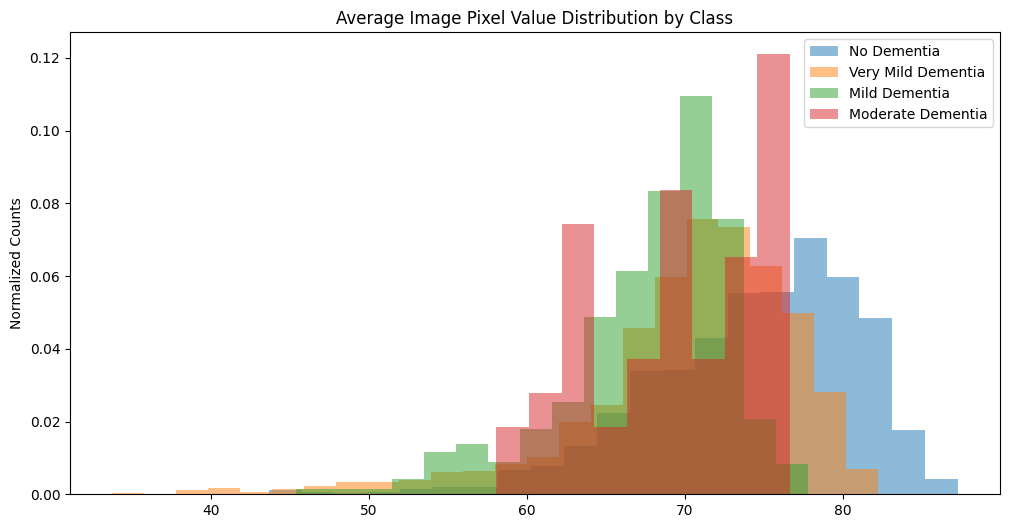

In [ ]:
# Help understanding and utilizing histogram plots from:
#  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

plt.figure(figsize = (12,6))
plt.hist(no_dem_img_avg, density = True, histtype = 'stepfilled', alpha = 0.5, bins = int((no_dem_img_avg.max() - no_dem_img_avg.min())/2))
plt.hist(vm_dem_img_avg, density = True, histtype = 'stepfilled', alpha = 0.5, bins = int((vm_dem_img_avg.max() - vm_dem_img_avg.min())/2))
plt.hist(mild_dem_img_avg, density = True, histtype = 'stepfilled', alpha = 0.5, bins = int((mild_dem_img_avg.max() - mild_dem_img_avg.min())/2))
plt.hist(mod_dem_img_avg, density = True, histtype = 'stepfilled', alpha = 0.5, bins = int((mod_dem_img_avg.max() - mod_dem_img_avg.min())/2))
plt.title('Average Image Pixel Value Distribution by Class')
plt.legend(labels = class_names)
plt.ylabel('Normalized Counts')
plt.show();

#### OBSERVATIONS:
* Generally speaking, the average of the average image intensities for all images in each class tends to decrease with increasing level of dementia
  * In the case of moderate dementia however, the image intensity starts to rebound
* The Average image pixel value distributions show that the pixel values all classes tend to be left skewed.
* Average pixel distributions for all classes save for the Moderate Dementia class are at least somewhat normally distributed
  * The Moderate Dementia class is not normally distributed.  This could be due to the relatively small number of samples (images) in that class

## 2.3 - Visual Image Analysis
Here's the image dataframe is used to create an average brain image for each class by averaging the value of each individual pixel across all images.  The intent is to use these images to create visual comparisons of the different levels of dementia.

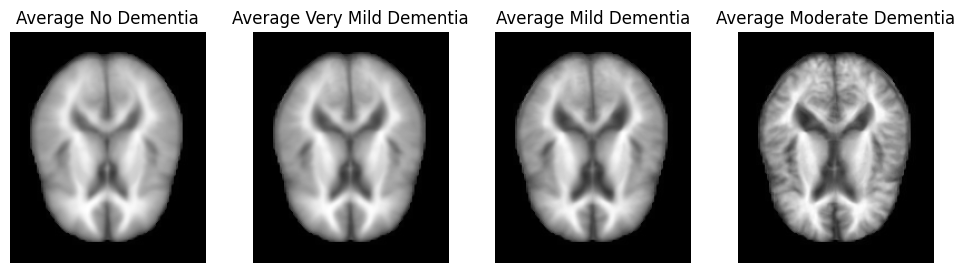

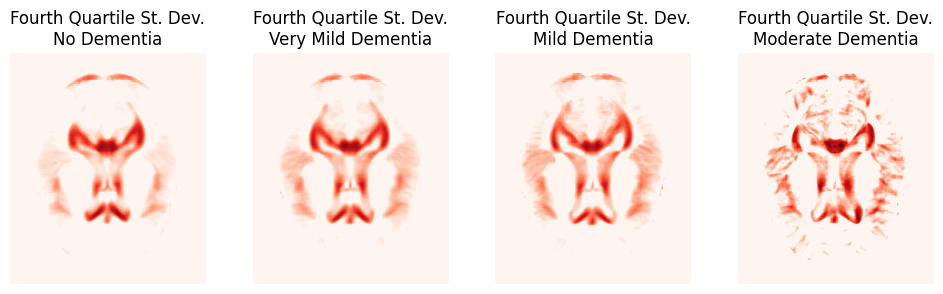

In [ ]:
# Plot the average brain image for each class to understnad trends visually
plt.figure(figsize = (12, 3))

filtered_dfs = [no_dem_df, vm_dem_df, mild_dem_df, mod_dem_df]
class_names = ['No Dementia', 'Very Mild Dementia', 'Mild Dementia', 'Moderate Dementia']

for i in range(4):
  plt.subplot(1, 4, i+1)
  # Sources for help with color maps:  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
  plt.imshow(np.array(filtered_dfs[i].mean()).reshape(208 , 176), cmap = 'gray')
  plt.title(f'Average {class_names[i]}')
  plt.axis('off')

plt.show();

# Plot the brain image standard deviations
plt.figure(figsize = (12, 3))

filtered_dfs = [no_dem_df, vm_dem_df, mild_dem_df, mod_dem_df]
class_names = ['No Dementia', 'Very Mild Dementia', 'Mild Dementia', 'Moderate Dementia']

for i in range(4):
  plt.subplot(1, 4, i+1)
  # Sources for help with color maps:  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
  plt.imshow(np.array(filtered_dfs[i].std()).reshape(208 , 176), cmap = 'Reds', vmin = 47, vmax = 90)
  plt.title(f'Fourth Quartile St. Dev.\n{class_names[i]}')
  plt.axis('off')

plt.show();

#### NOTE:
Above, the 4th quartile standard deviation of the pixel values for each class is shown.  The 4th quartile is specifiaclly highlighted in the images above to show the areas which exhibit the most varaiance from image to image.  In other words, the darker red regions are areas where the brain images will differ the most from one-another.  The 4th quartile was selected to make viewing the difference easier, and all standard deviation below the 75th percentile will show up as white (with a slight red tine due to the color map).  These images were generated by applying a color map with the lower limit set approximately to the 75% percentile pixel value standard deviation for the entire dataset of about 47 (from the the first summary statistics table generated) and the maximum pixel value standard deviation of about 87 (entered as 90 in the color map).

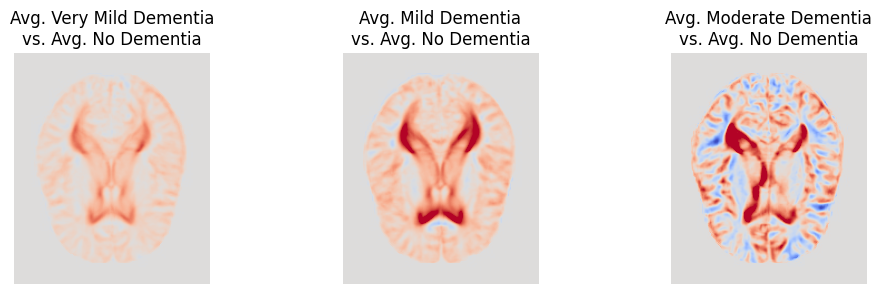

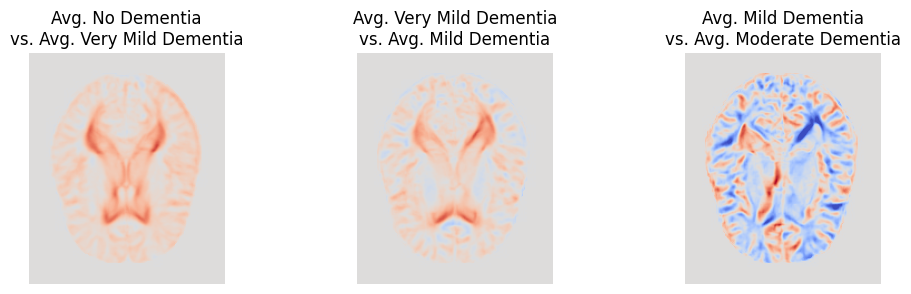

In [ ]:
# Plot the average brain image differences versus No Dementia Class for each class to understnad trends visually

# Establish list of dataframes to loop through
filtered_dfs = [no_dem_df, vm_dem_df, mild_dem_df, mod_dem_df]

# Establish list of class names to loop through for image titles
class_names = ['No Dementia','Very Mild Dementia', 'Mild Dementia', 'Moderate Dementia']

# ==================  Brain Degradation vs. No Dementia  ======================

# Set overall figure size
plt.figure(figsize = (12, 3))

# Loop averaged images
for i in range(3):
  plt.subplot(1, 3, i+1)
  # Sources for help with color maps:  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
  plt.imshow(
      np.array(filtered_dfs[0].mean()).reshape(208 , 176) - np.array(filtered_dfs[i+1].mean()).reshape(208 , 176),
      cmap = 'coolwarm', vmin = -50, vmax = 50)
  plt.title(f'Avg. {class_names[i+1]}\nvs. Avg. No Dementia')
  plt.axis('off')
plt.show();

# ==================  Brain Degradation Progression  ======================

# Set overall figure size
plt.figure(figsize = (12, 3))

# Loop averaged images
for i in range(3):
  plt.subplot(1, 3, i+1)
  # Sources for help with color maps:  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
  plt.imshow(
      np.array(filtered_dfs[i].mean()).reshape(208 , 176) - np.array(filtered_dfs[i+1].mean()).reshape(208 , 176),
      cmap = 'coolwarm', vmin = -50, vmax = 50)
  plt.title(f'Avg. {class_names[i]}\nvs. Avg. {class_names[i+1]}')
  plt.axis('off')
plt.show();

#### NOTE:
Above the color map is not shown but areas of red indicate regions of the brain where brain tissue has degenerated in comarison to no dementia (in the top row) or to the next less-severe level of dementia (in the bottom row).  Areas in blue indicate regions where there is actually less degeneration in the more severe class compared to the less severe.  Possible reasons for this are discussed later.

These comparison were perfomred by subtracting the average pixel values for more severely demented of the compared classes from the less severely demented.  With this, a positive number indicates that the pixel values have decreased going to the more severely demented class in each comparison.

#### OBSERVATIONS:
* With each progressive stage of dementia, more darker pixels can be observed in the average images for each class.  As dementia is a type of brain degeneration, brains with more severe dementia have less brain matter, and less brain matter shows up as darker on the MRI image.  Thus, the observed trend of darker images with more sever dementia appears to make sense
* The 4th quartile standard deviations are more informative than conculisve in nature especially given that the classes are imbalanced
* The progression of brain degeneration can clearly be seen at each stage of dementia relative to the no-dementia class.  Darker areas of red indicate additional loss of brain tissue as dementia progresses
* There are however areas colored in blue which indicate the more severly demented image is actually producing higher average pixel values in those regions.  This is particularly promnent in the moderate dementia class. This goes contrary to the trend of brain degeneration, but some possible explanations are provided here:
  * Class imbalances may be the cause of these discrepancies.  WIth relatively few images in the moderate dementia class, it's possible that the brains sampled may exhibit more or less brain degeneration than in other classes with more samples perhaps due to a few outliers
  * Without knowing exactly how the MRI images are generated as it relates to pixel values, it is possble that there could be imaging effects which create these discrepencies.  Though not based in any researched, it may also be possible that the images are adjusted in intensity depending on how much dementia occurs to make them easier for clinicians to read.  Any of these causes could technically affect the entire dataset.  Thus, the images shown are more informative in nature, and less-usefull for this level of modeling


# 3 - Overall Observations
* The different dementia classes are highly imbalanced
* All images in the training and test sets are the same size
* The test dataset images appear to be taken at a different cross-section of the brain than those in the training dataset
* Generally average image pixel values decrease with more severe dementia and brain degneration can be oberved across the average images as dementia severity increases